In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
amino_acid_map = {
    'ALA': 'A','ARG': 'R','ASN': 'N','ASP': 'D','CYS': 'C','GLU': 'E','GLN': 'Q','GLY': 'G','HIS': 'H','ILE': 'I',
    'LEU': 'L','LYS': 'K','MET': 'M','PHE': 'F','PRO': 'P','SER': 'S','THR': 'T','TRP': 'W','TYR': 'Y','VAL': 'V'
}

In [27]:
# Load the CSV data into a DataFrame
df = pd.read_csv('Dec.csv')
df['resid_number'] = df['resid'].str.extract(r':(\d+)$').astype(int)
df_sorted = df.sort_values(by='resid_number')
df_sorted = df_sorted.reset_index(drop=True)

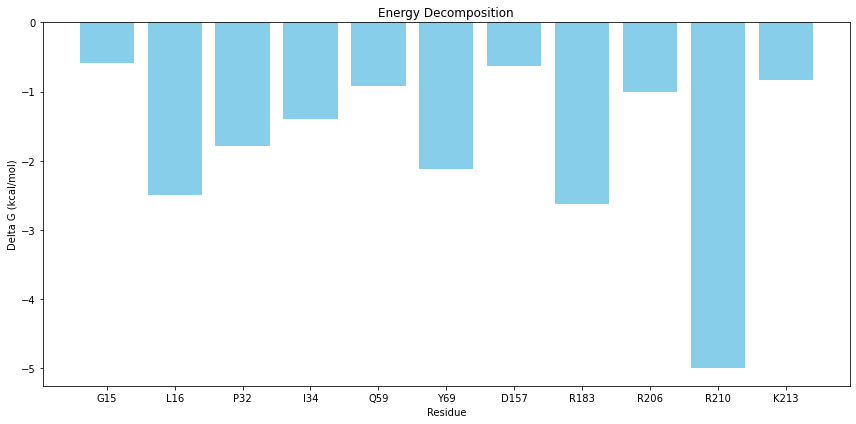

In [28]:
# Extract the residue names and total energies
res_names = []
energys = []
for i in range(len(df_sorted)):
    if df_sorted['resid'][i].split(':')[-2] not in amino_acid_map.keys():
        continue
    res_name = amino_acid_map[df_sorted['resid'][i].split(':')[-2]] + df_sorted['resid'][i].split(':')[-1]
    energy = df_sorted['TOTAL'][i]
    res_names.append(res_name)
    energys.append(energy)

# Plot the total energy for each residue
plt.figure(figsize=(12, 6))
plt.bar(res_names, energys, color='skyblue')
plt.xlabel('Residue')
plt.ylabel('Delta G (kcal/mol)')
plt.title('Energy Decomposition')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('residue_total_energy.png', dpi=300)
plt.show()